## Data

> This telco customer churn dataset is came from https://www.kaggle.com/blastchar/telco-customer-churn

## Objective

> 1. For practice and enhance my ability in data analysis
2. Finding the best Classification Algorithm based on Accuracy
3. Analyzing business problem which is customer behavior

## Features

> 1. customerID
       - Customer ID
2. gender
       - Whether the customer is a male or a female
3. SeniorCitizen
       - Whether the customer is a senior citizen or not (1, 0)
4. Partner
       - Whether the customer has a partner or not (Yes, No)
5. Dependents
       - Whether the customer has dependents or not (Yes, No)
6. tenure
       - Number of months the customer has stayed with the company
7. PhoneService
       - Whether the customer has a phone service or not (Yes, No)
8. MultipleLines
       - Whether the customer has multiple lines or not (Yes, No, No phone service)
9. InternetService
       - Customer’s internet service provider (DSL, Fiber optic, No)
10. OnlineSecurity
        - Whether the customer has online security or not (Yes, No, No internet service)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(palette='pastel')

Read "Telco Customer Churn" dataset which was downloaded on my local computer

In [2]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,1052-QJIBV,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


Save customer ID for later

In [6]:
cust_id=df['customerID']

Drop "customerID"  columns because we dont realy need it

In [7]:
df=df.drop(columns='customerID', axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
# df['TotalCharges'].str.contains(' ').sort_values(ascending=False)

Change 'TotalCharge' column type as float

In [9]:
df['TotalCharges']=df['TotalCharges'].replace(' ',np.nan )
df['TotalCharges']=df['TotalCharges'].astype('float')
df['TotalCharges'].dtype

dtype('float64')

Gather categorical data and check what data is in it for each columns

In [10]:
df_cat=df.select_dtypes(include=['object']).copy()
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [11]:
df_cat.apply(pd.Series.value_counts)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
Bank transfer (automatic),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1544.0,NaN
Credit card (automatic),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1522.0,NaN
DSL,NaN,NaN,NaN,NaN,NaN,2421.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Electronic check,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2365.0,NaN
Female,3488.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fiber optic,NaN,NaN,NaN,NaN,NaN,3096.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mailed check,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1612.0,NaN
Male,3555.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month-to-month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3875.0,NaN,NaN,NaN
No,NaN,3641.0,4933.0,682.0,3390.0,1526.0,3498.0,3088.0,3095.0,3473.0,2810.0,2785.0,NaN,2872.0,NaN,5174.0


    In this case we assume that No Internet Service & No Phone Service = No,
    for 'InternetService' column DSL = 1, Fiber Optic = 2,
    for 'gender' column Male=1 and Female=0,
    for 'Contract' column Month-to-month=3, One year=1, Two year=2,
    for 'PaymentMethod Bank transfer (automatic)=1, Credit card (automatic)=2, Electronic check=3, Mailed check=4,
    and replace to df_cat


In [12]:
df_cat=df.replace({'Yes':1, 'No': 0, 'No internet service' : 0, 'No phone service': 0,
              'DSL': 1, 'Fiber optic': 2,
              'Male': 1, 'Female': 0,
              'One year': 1, 'Two year': 2, 'Month-to-month': 3,
              'Bank transfer (automatic)': 1, 'Credit card (automatic)': 2, 'Electronic check': 3, 'Mailed check': 4})
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


## Visualization

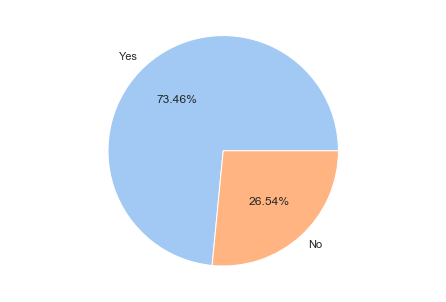

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels=['Yes', 'No']
ax.pie(df_cat['Churn'].value_counts(), labels=labels, autopct='%.2f%%')
plt.show()

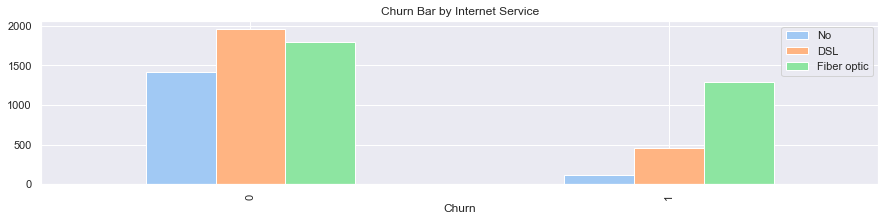

In [14]:
pd.crosstab(df_cat['Churn'], df_cat['InternetService']).plot(kind='bar', figsize=(15, 3), title='Churn Bar by Internet Service')
label=['No', 'DSL', 'Fiber optic']
plt.legend(label)
plt.show()

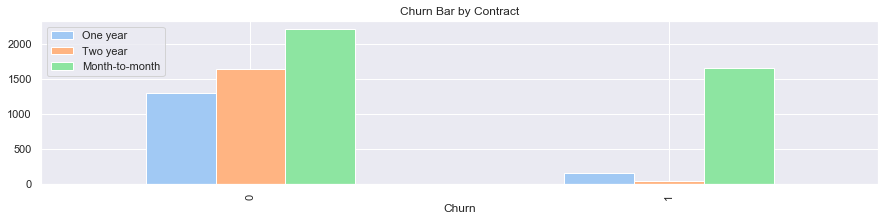

In [15]:
pd.crosstab(df_cat['Churn'], df_cat['Contract']).plot(kind='bar', figsize=(15, 3), title='Churn Bar by Contract')
label=['One year', 'Two year', 'Month-to-month']
plt.legend(label)

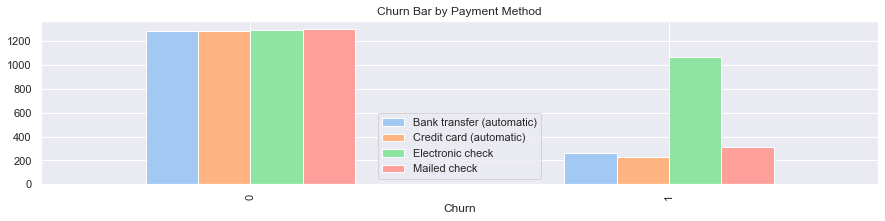

In [16]:
pd.crosstab(df_cat['Churn'], df_cat['PaymentMethod']).plot(kind='bar', figsize=(15, 3), title='Churn Bar by Payment Method')
label=['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']
plt.legend(label)

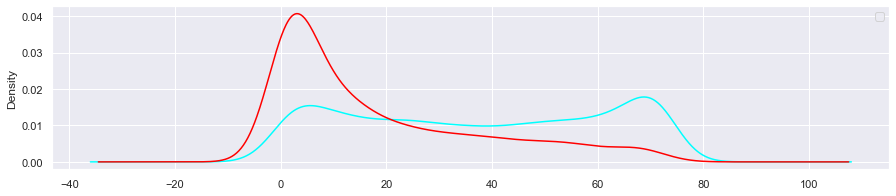

In [17]:
plt.figure(figsize=(15,3))
df_cat[df_cat.Churn==0]['tenure'].plot(color='cyan', kind='kde')
df_cat[df_cat.Churn==1]['tenure'].plot(color='red', kind='kde')
plt.legend('No Churn', 'Churn')
plt.show()

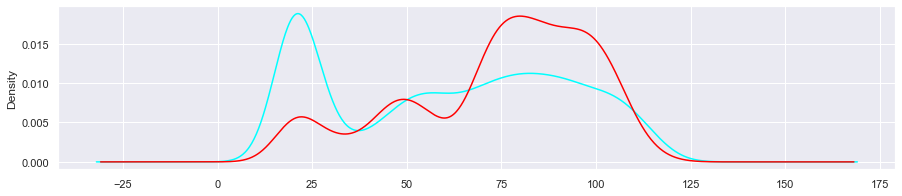

In [18]:
plt.figure(figsize=(15,3))
df_cat[df_cat.Churn==0]['MonthlyCharges'].plot(color='cyan', kind='kde')
df_cat[df_cat.Churn==1]['MonthlyCharges'].plot(color='red', kind='kde')
plt.show()

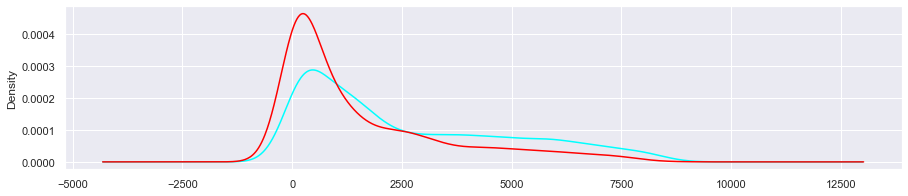

In [19]:
plt.figure(figsize=(15,3))
df_cat[df_cat.Churn==0]['TotalCharges'].plot(color='cyan', kind='kde')
df_cat[df_cat.Churn==1]['TotalCharges'].plot(color='red', kind='kde')
plt.show()

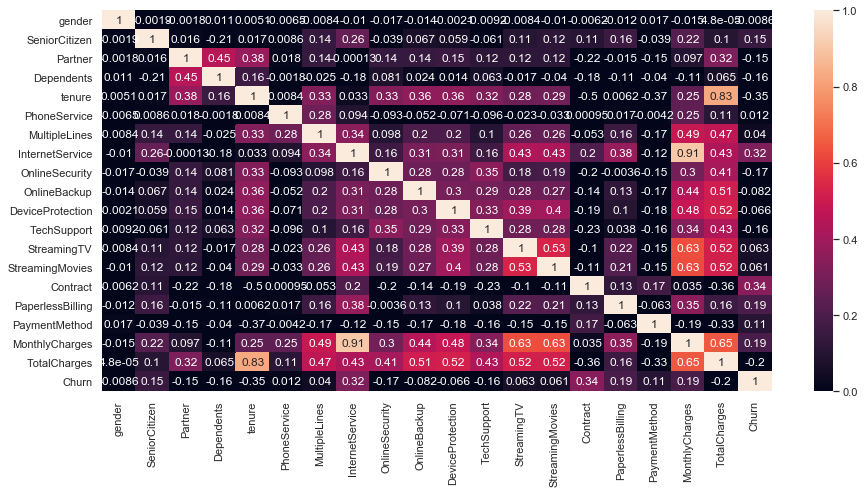

In [20]:
corr_mat=df_cat.corr()
plt.figure(figsize=(15, 7))
sns.heatmap(corr_mat, annot=True, fmt='.2g', vmin=0)
plt.show()

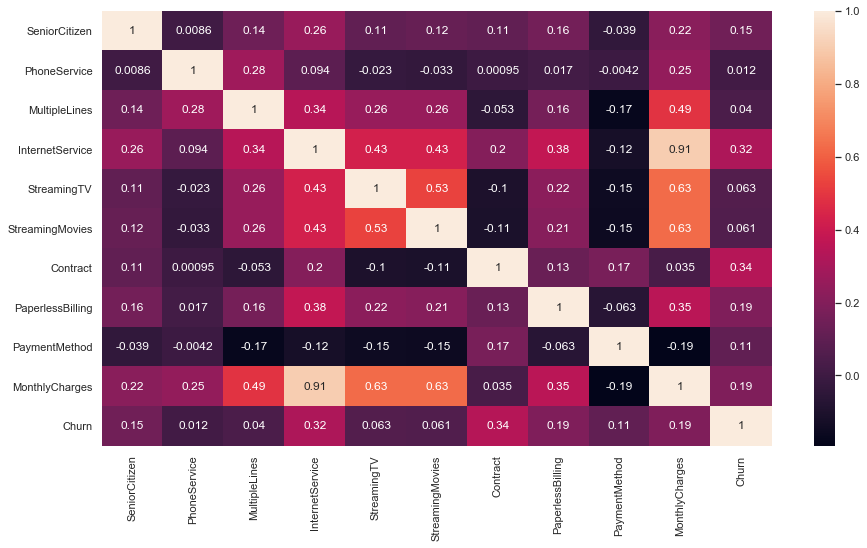

In [21]:
top_corr=corr_mat.index[corr_mat['Churn']>0]
plt.figure(figsize=(15,8))
sns.heatmap(df_cat[top_corr].corr(), annot=True)
plt.show()

## What we got here
1. customer who is churn is get lower percentage than not churn, the percentage is 26.5% for churn and 73.5 no churn. i think this is an imbalance dataset
2. customer yang memilih service fiber optic, pembayaran month-to-month, dan menggunakan metode payment electronic check banyak melakukan churn
3. pada awal bulan pemakaian service, banyak customer yang churn dan pada customer tidak churn mereka bertahan lama
4. monthly charge dengan churn tertinggi terjadi pada charge tinggi
5. untuk total charge, banyak customer yang churn di total charge rendah.
6. kolom InternetService dan Contract memiliki korelasi positif yang paling tinggi, mereka memiliki nilai yang hampir sama terhadap kolom Churn

## Handling Missing Data

In [22]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [23]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())
df['Churn']=df['Churn'].replace({'Yes':1, 'No': 0})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## Transform Data

In [24]:
df=pd.get_dummies(df)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   MonthlyCharges                           7043 non-null   float64
 3   TotalCharges                             7043 non-null   float64
 4   Churn                                    7043 non-null   int64  
 5   gender_Female                            7043 non-null   uint8  
 6   gender_Male                              7043 non-null   uint8  
 7   Partner_No                               7043 non-null   uint8  
 8   Partner_Yes                              7043 non-null   uint8  
 9   Dependents_No                            7043 non-null   uint8  
 10  Dependents_Yes                           7043 no

### Modeling

In [26]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report,accuracy_score

In [27]:
X=df.drop('Churn', axis=1)
y=df['Churn']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,y_train.shape, X_test.shape, y_test.shape)

(5634, 45) (5634,) (1409, 45) (1409,)


## Logistic Regression

In [28]:
lr=LogisticRegression()
lr=lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)
print(classification_report(y_test, lr_pred))
print(lr.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.69      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.76      1409
weighted avg       0.81      0.82      0.81      1409

0.8197303051809794


In [29]:
lr_param={'C': np.logspace(-4,4,20),
         'penalty': ['l1', 'l2'],
         'max_iter': list(range(10,1000, 10)),
          'solver': ['liblinear', 'l1', 'l2']}

grid_lr=GridSearchCV(LogisticRegression(), 
                    param_grid=lr_param,
                    cv=5,
                    n_jobs=-1)

tune_lr=grid_lr.fit(X_train, y_train)

tune_lr_pred_train=tune_lr.predict(X_train)
tune_lr_pred_test=tune_lr.predict(X_test)

print(tune_lr.best_params_, tune_lr.best_score_)   
print('\nTrain Report: \n', classification_report(y_train, tune_lr_pred_train))
print('\nTest Report: \n', classification_report(y_test, tune_lr_pred_test))

{'C': 0.03359818286283781, 'max_iter': 30, 'penalty': 'l2', 'solver': 'liblinear'} 0.8040460141118768

Train Report: 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      4138
           1       0.67      0.53      0.59      1496

    accuracy                           0.80      5634
   macro avg       0.75      0.72      0.73      5634
weighted avg       0.80      0.80      0.80      5634


Test Report: 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.76      1409
weighted avg       0.81      0.82      0.81      1409



## SGD Classifier

In [30]:
sgdc=SGDClassifier()
sgdc=sgdc.fit(X_train,y_train)
sgdc_pred=sgdc.predict(X_test)
print(classification_report(y_test, sgdc_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1036
           1       0.62      0.53      0.57       373

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409



In [31]:
sgdc_param={'alpha' : [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1],
           'loss' : ['log'],
           'penalty': ['l1', 'l2', 'elasticnet'],
           'l1_ratio':[0.05,0.06,0.07,0.08,0.09,0.1,0.12,0.13,0.14,0.15,0.2]}

grid_sgdc=GridSearchCV(SGDClassifier(),
                      param_grid=sgdc_param,
                      cv=5,
                      n_jobs=-1)

tune_sgdc=grid_sgdc.fit(X_train, y_train)

tune_sgdc_pred_train=tune_sgdc.predict(X_train)
tune_sgdc_pred_test=tune_sgdc.predict(X_test)

print(tune_sgdc.best_params_, tune_sgdc.best_score_)   
print('\nTrain Report: \n', classification_report(y_train, tune_sgdc_pred_train))
print('\nTest Report: \n', classification_report(y_test, tune_sgdc_pred_test))

{'alpha': 10.0, 'l1_ratio': 0.1, 'loss': 'log', 'penalty': 'l2'} 0.7846997877071904

Train Report: 
               precision    recall  f1-score   support

           0       0.81      0.92      0.86      4138
           1       0.65      0.39      0.48      1496

    accuracy                           0.78      5634
   macro avg       0.73      0.66      0.67      5634
weighted avg       0.76      0.78      0.76      5634


Test Report: 
               precision    recall  f1-score   support

           0       0.81      0.92      0.87      1036
           1       0.66      0.41      0.51       373

    accuracy                           0.79      1409
   macro avg       0.74      0.67      0.69      1409
weighted avg       0.77      0.79      0.77      1409



## Random Forest Classifier

In [32]:
rf=RandomForestClassifier()
rf=rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
print(rf)
print(classification_report(y_test, rf_pred))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.67      0.46      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



In [33]:
rf_param={'criterion': ['gini', 'entropy'],
         'bootstrap': [True, False],
         'max_depth': [list(range(10,110,10)), None],
         'min_samples_leaf': [2,3,4],
         'min_samples_split': [2,4,6],
         'n_estimators': list(range(1000,2200,200))}

grid_rf=GridSearchCV(RandomForestClassifier(),
                    param_grid=rf_param,
                    cv=5,
                    n_jobs=-1)

tune_rf=grid_rf.fit(X_train, y_train)

tune_rf_pred_train=tune_rf.predict(X_train)
tune_rf_pred_test=tune_rf.predict(X_test)

print(tune_rf.best_params_, tune_rf.best_score_)   
print('\nTrain Report: \n', classification_report(y_train, tune_rf_pred_train))
print('\nTest Report: \n', classification_report(y_test, tune_rf_pred_test))

{'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 1200} 0.8017388467472865

Train Report: 
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      4138
           1       0.83      0.64      0.72      1496

    accuracy                           0.87      5634
   macro avg       0.85      0.80      0.82      5634
weighted avg       0.87      0.87      0.86      5634


Test Report: 
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



## Decision Tree

In [34]:
tree=DecisionTreeClassifier()
tree=tree.fit(X_train, y_train)
tree_pred=tree.predict(X_test)
print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1036
           1       0.47      0.49      0.48       373

    accuracy                           0.72      1409
   macro avg       0.64      0.65      0.64      1409
weighted avg       0.72      0.72      0.72      1409



In [35]:
tree_param={'criterion': ['gini', 'entropy'],
         'max_depth': [list(range(10,110,10)), None],
         'min_samples_leaf': [2,3,4],
         'min_samples_split': [6,8,10,12],
         'max_features': ['sqrt', 'log2']}

grid_tree=GridSearchCV(DecisionTreeClassifier(),
                    param_grid=tree_param,
                    cv=5,
                    n_jobs=-1)

tune_tree=grid_tree.fit(X_train, y_train)

tune_tree_pred_train=tune_tree.predict(X_train)
tune_tree_pred_test=tune_tree.predict(X_test)

print(tune_tree.best_params_, tune_tree.best_score_)   
print('\nTrain Report: \n', classification_report(y_train, tune_tree_pred_train))
print('\nTest Report: \n', classification_report(y_test, tune_tree_pred_test))

{'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 12} 0.768545991259273

Train Report: 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      4138
           1       0.77      0.64      0.70      1496

    accuracy                           0.85      5634
   macro avg       0.82      0.79      0.80      5634
weighted avg       0.85      0.85      0.85      5634


Test Report: 
               precision    recall  f1-score   support

           0       0.82      0.87      0.84      1036
           1       0.55      0.46      0.50       373

    accuracy                           0.76      1409
   macro avg       0.68      0.66      0.67      1409
weighted avg       0.75      0.76      0.75      1409



## AdaBoost Classifier

In [36]:
ada=AdaBoostClassifier()
ada=ada.fit(X_train,y_train)
ada_pred=ada.predict(X_test)
print(classification_report(y_test, ada_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.57      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [37]:
ada_param={'n_estimators': list(range(0, 350, 50)),
          'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1, 2, 5]
          }

grid_ada=GridSearchCV(AdaBoostClassifier(),
                     param_grid=ada_param,
                     n_jobs=-1,
                     cv=5)

tune_ada=grid_ada.fit(X_train, y_train)

tune_ada_pred_train=tune_ada.predict(X_train)
tune_ada_pred_test=tune_ada.predict(X_test)

print(tune_ada.best_params_, tune_ada.best_score_)   
print('\nTrain Report: \n', classification_report(y_train, tune_ada_pred_train))
print('\nTest Report: \n', classification_report(y_test, tune_ada_pred_test))

{'learning_rate': 0.1, 'n_estimators': 300} 0.8017393195597802

Train Report: 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      4138
           1       0.67      0.53      0.59      1496

    accuracy                           0.81      5634
   macro avg       0.76      0.72      0.73      5634
weighted avg       0.80      0.81      0.80      5634


Test Report: 
               precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.57      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



## Gradient Boosting Classifier

In [38]:
gbc=GradientBoostingClassifier()
gbc=gbc.fit(X_train,y_train)
gbc_pred=gbc.predict(X_test)
print(classification_report(y_test, gbc_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.53      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [39]:
gbc_param={'n_estimators': list(range(1000, 1800, 100)),
          'learning_rate': [0.01, 0.1, 1,0.05,0.5, 5],
          'loss': ['deviance', 'exponential']}

grid_gbc=GridSearchCV(GradientBoostingClassifier(),
                     param_grid=gbc_param,
                     n_jobs=-1,
                     cv=5)

tune_gbc=grid_gbc.fit(X_train, y_train)

tune_gbc_pred_train=tune_gbc.predict(X_train)
tune_gbc_pred_test=tune_gbc.predict(X_test)

print(tune_gbc.best_params_, tune_gbc.best_score_)   
print('\nTrain Report: \n', classification_report(y_train, tune_gbc_pred_train))
print('\nTest Report: \n', classification_report(y_test, tune_gbc_pred_test))

{'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 1000} 0.8031583874572302

Train Report: 
               precision    recall  f1-score   support

           0       0.85      0.92      0.88      4138
           1       0.72      0.56      0.63      1496

    accuracy                           0.82      5634
   macro avg       0.78      0.74      0.76      5634
weighted avg       0.82      0.82      0.82      5634


Test Report: 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.53      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



## MLP Classifier

In [40]:
mlp=MLPClassifier()
mlp=mlp.fit(X_train,y_train)
mlp_pred=mlp.predict(X_test)
print(classification_report(y_test,mlp_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      1036
           1       0.72      0.43      0.54       373

    accuracy                           0.80      1409
   macro avg       0.77      0.68      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [41]:
mlp_param = {
    'hidden_layer_sizes': [(10,),(15,),(20,),(25,),(30,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.001, 0.01,0.1, 0.005, 0.05, 0.5],
    'learning_rate': ['constant','adaptive'],
}

grid_mlp=GridSearchCV(MLPClassifier(),
                     param_grid=mlp_param,
                     cv=5,
                     n_jobs=-1)

tune_mlp=grid_mlp.fit(X_train, y_train)

tune_mlp_pred_train=tune_mlp.predict(X_train)
tune_mlp_pred_test=tune_mlp.predict(X_test)

print(tune_mlp.best_params_, tune_mlp.best_score_)   
print('\nTrain Report: \n', classification_report(y_train, tune_mlp_pred_train))
print('\nTest Report: \n', classification_report(y_test, tune_mlp_pred_test))

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (25,), 'learning_rate': 'constant', 'solver': 'adam'} 0.8022702879900898

Train Report: 
               precision    recall  f1-score   support

           0       0.89      0.63      0.74      4138
           1       0.43      0.77      0.55      1496

    accuracy                           0.67      5634
   macro avg       0.66      0.70      0.65      5634
weighted avg       0.77      0.67      0.69      5634


Test Report: 
               precision    recall  f1-score   support

           0       0.89      0.63      0.73      1036
           1       0.43      0.78      0.55       373

    accuracy                           0.67      1409
   macro avg       0.66      0.70      0.64      1409
weighted avg       0.77      0.67      0.69      1409



# Evaluation

### Logistic Regression Classification Report

    {'C': 0.03359818286283781, 'max_iter': 30, 'penalty': 'l2', 'solver': 'liblinear'} 0.8040460141118768

    Train Report: 
                   precision    recall  f1-score   support

               0       0.84      0.90      0.87      4138
               1       0.67      0.53      0.59      1496

        accuracy                           0.80      5634
       macro avg       0.75      0.72      0.73      5634
    weighted avg       0.80      0.80      0.80      5634


    Test Report: 
                   precision    recall  f1-score   support

               0       0.86      0.90      0.88      1036
               1       0.69      0.58      0.63       373

        accuracy                           0.82      1409
       macro avg       0.77      0.74      0.76      1409
    weighted avg       0.81      0.82      0.81      1409

### Adaboost Classification Report

    {'learning_rate': 0.1, 'n_estimators': 300} 0.8017393195597802

    Train Report: 
                   precision    recall  f1-score   support

               0       0.84      0.90      0.87      4138
               1       0.67      0.53      0.59      1496

        accuracy                           0.81      5634
       macro avg       0.76      0.72      0.73      5634
    weighted avg       0.80      0.81      0.80      5634


    Test Report: 
                   precision    recall  f1-score   support

               0       0.85      0.90      0.88      1036
               1       0.68      0.57      0.62       373

        accuracy                           0.82      1409
       macro avg       0.77      0.74      0.75      1409
    weighted avg       0.81      0.82      0.81      1409

## Adaboost Feature Importance

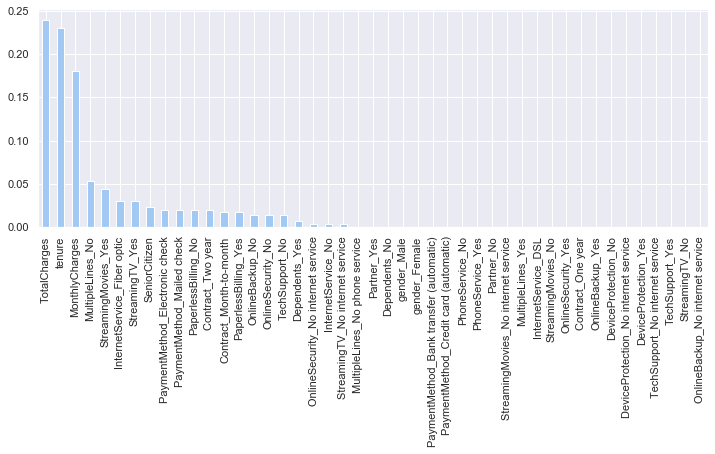

In [119]:
coef=pd.Series(AdaBoostClassifier(learning_rate= 0.1, n_estimators= 300).fit(X_train,y_train).feature_importances_, index=X.columns)
imp_coef=pd.concat([coef.sort_values(ascending=False)])
imp_coef.plot(kind='bar', figsize=(12,4))
plt.show()

In [75]:
proba=tune_ada.predict_proba(df[X_test.columns])[:,1]
result=pd.DataFrame({'CustomerID': cust_id, 
                     'Probability': np.round(proba*100)})
result.sort_values(by='Probability', ascending=False)

,CustomerID,Probability
4610,2889-FPWRM,56.0
4875,2302-ANTDP,52.0
5127,8199-ZLLSA,52.0
1600,3068-OMWZA,51.0
6866,0295-PPHDO,51.0
6620,6457-USBER,51.0
1704,0107-YHINA,51.0
2397,3722-WPXTK,51.0
2191,3988-RQIXO,51.0
6748,6230-BSUXY,51.0


## Logisctic Regression Feature importance

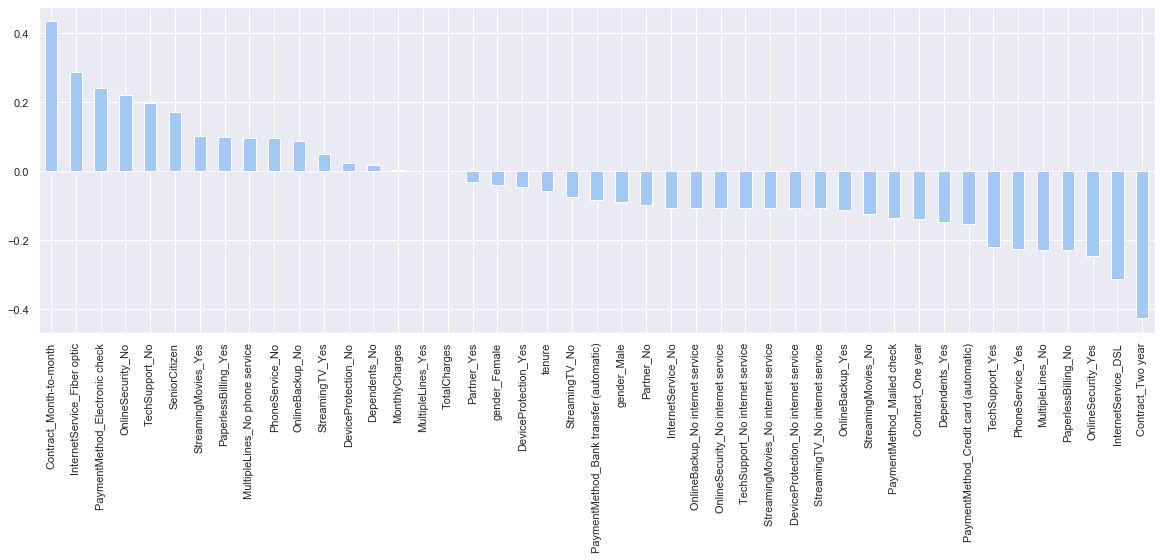

In [120]:
lr_model=LogisticRegression(C= 0.03359818286283781, max_iter= 30, penalty= 'l2', solver= 'liblinear')
coef=pd.Series(lr_model.fit(X_train,y_train).coef_[0], 
               index=X.columns.values)
imp_coef=coef.sort_values(ascending=False)
imp_coef.plot(kind='bar', figsize=(20,6))
plt.show()

In [121]:
proba=tune_lr.predict_proba(df[X_test.columns])[:,1]
result=pd.DataFrame({'CustomerID': cust_id, 
                     'Probability': np.round(proba*100)})
result.sort_values(by='Probability', ascending=False)

,CustomerID,Probability
2208,7216-EWTRS,85.0
3380,5178-LMXOP,85.0
4800,9300-AGZNL,84.0
5989,5567-WSELE,84.0
1976,9497-QCMMS,84.0
1410,7024-OHCCK,84.0
997,1374-DMZUI,83.0
3159,5150-ITWWB,83.0
301,8098-LLAZX,83.0
6368,2720-WGKHP,83.0


we can see that Adaboost Classifier has 81% train data accuracy and 82% test data accuracy, 
Logistic Regression with 80% train data accuracy and 82% test data accuracy. So i pick Logistic Regression Model because it has better precision score in test classification report (86%) than Adaboost test classification report(84%)